In [19]:
#Import the necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#importing the datset and reading the 1st 5 rows
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#Splitting the dataset into dependent and independent features
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [22]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [23]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Feature Engineering

In [24]:
#Geography column
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
#Gender Column
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [26]:
#One Hot Encoding the Geography and Gender columns

geography = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [27]:
#Dropping the geography and gender columns from the dataset
X.drop(columns=['Geography','Gender'],inplace=True)

In [28]:
#Concatenating the onehot encoded columns with the datset
X = pd.concat([X,geography,gender],axis = 1)

In [29]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =0)

# Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [33]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [34]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [37]:
#initialize the ANN
classifier = Sequential()

In [38]:
#Adding the input Layers
classifier.add(Dense(units=11,activation='relu'))

In [39]:
#Adding the 1st hidden layer
classifier.add(Dense(units =7,activation ='relu'))

#to add dropout

#classifier.add(Dropout(0.3))

In [40]:
#adding the 2nd hidden layer
classifier.add(Dense(units = 5,activation='relu'))

In [41]:
#adding the output layer
classifier.add(Dense(units =1,activation='sigmoid'))

In [42]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
## To specify any particular Learning Rate
# import tensorflow
# opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [47]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs =500)

Epoch 1/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8696 - val_loss: 0.3680 - val_accuracy: 0.8542
Epoch 2/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8696 - val_loss: 0.3662 - val_accuracy: 0.8504
Epoch 3/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8684 - val_loss: 0.3700 - val_accuracy: 0.8501
Epoch 4/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8690 - val_loss: 0.3675 - val_accuracy: 0.8523
Epoch 5/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8705 - val_loss: 0.3732 - val_accuracy: 0.8516
Epoch 6/500
536/536 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8714 - val_loss: 0.3658 - val_accuracy: 0.8519
Epoch 7/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3173 - accuracy: 0.8699 - val_loss: 0.3656 - val_accuracy: 0.8531

Epoch 58/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3107 - accuracy: 0.8739 - val_loss: 0.3747 - val_accuracy: 0.8519
Epoch 59/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3096 - accuracy: 0.8739 - val_loss: 0.3757 - val_accuracy: 0.8489
Epoch 60/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.8742 - val_loss: 0.3750 - val_accuracy: 0.8478
Epoch 61/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3089 - accuracy: 0.8770 - val_loss: 0.3730 - val_accuracy: 0.8478
Epoch 62/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3095 - accuracy: 0.8759 - val_loss: 0.3736 - val_accuracy: 0.8508
Epoch 63/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3104 - accuracy: 0.8757 - val_loss: 0.3730 - val_accuracy: 0.8485
Epoch 64/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3093 - accuracy: 0.8757 - val_loss: 0.3698 - val_accuracy:

Epoch 115/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3051 - accuracy: 0.8761 - val_loss: 0.3777 - val_accuracy: 0.8519
Epoch 116/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.8780 - val_loss: 0.3771 - val_accuracy: 0.8508
Epoch 117/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.8765 - val_loss: 0.3759 - val_accuracy: 0.8504
Epoch 118/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3054 - accuracy: 0.8761 - val_loss: 0.3778 - val_accuracy: 0.8527
Epoch 119/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3042 - accuracy: 0.8746 - val_loss: 0.3793 - val_accuracy: 0.8569
Epoch 120/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3055 - accuracy: 0.8748 - val_loss: 0.3785 - val_accuracy: 0.8519
Epoch 121/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3045 - accuracy: 0.8767 - val_loss: 0.3755 - val_ac

536/536 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.8781 - val_loss: 0.3739 - val_accuracy: 0.8565
Epoch 172/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.8780 - val_loss: 0.3747 - val_accuracy: 0.8591
Epoch 173/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3019 - accuracy: 0.8781 - val_loss: 0.3766 - val_accuracy: 0.8576
Epoch 174/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3019 - accuracy: 0.8765 - val_loss: 0.3763 - val_accuracy: 0.8591
Epoch 175/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3019 - accuracy: 0.8776 - val_loss: 0.3789 - val_accuracy: 0.8546
Epoch 176/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3015 - accuracy: 0.8778 - val_loss: 0.3746 - val_accuracy: 0.8569
Epoch 177/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3026 - accuracy: 0.8772 - val_loss: 0.3792 - val_accuracy: 0.8576

536/536 [==============================] - 1s 3ms/step - loss: 0.3008 - accuracy: 0.8791 - val_loss: 0.3772 - val_accuracy: 0.8580
Epoch 228/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3001 - accuracy: 0.8791 - val_loss: 0.3737 - val_accuracy: 0.8573
Epoch 229/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.8774 - val_loss: 0.3805 - val_accuracy: 0.8554
Epoch 230/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3005 - accuracy: 0.8796 - val_loss: 0.3773 - val_accuracy: 0.8591
Epoch 231/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.8791 - val_loss: 0.3788 - val_accuracy: 0.8565
Epoch 232/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.8804 - val_loss: 0.3811 - val_accuracy: 0.8550
Epoch 233/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2995 - accuracy: 0.8750 - val_loss: 0.3777 - val_accuracy: 0.8595

536/536 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.8787 - val_loss: 0.3821 - val_accuracy: 0.8573
Epoch 284/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.8778 - val_loss: 0.3779 - val_accuracy: 0.8595
Epoch 285/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2990 - accuracy: 0.8772 - val_loss: 0.3796 - val_accuracy: 0.8595
Epoch 286/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2993 - accuracy: 0.8795 - val_loss: 0.3829 - val_accuracy: 0.8580
Epoch 287/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2988 - accuracy: 0.8791 - val_loss: 0.3841 - val_accuracy: 0.8580
Epoch 288/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2988 - accuracy: 0.8781 - val_loss: 0.3763 - val_accuracy: 0.8603
Epoch 289/500
536/536 [==============================] - 2s 3ms/step - loss: 0.2982 - accuracy: 0.8765 - val_loss: 0.3797 - val_accuracy: 0.8588

536/536 [==============================] - 1s 3ms/step - loss: 0.2986 - accuracy: 0.8804 - val_loss: 0.3809 - val_accuracy: 0.8573
Epoch 340/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2979 - accuracy: 0.8795 - val_loss: 0.3798 - val_accuracy: 0.8565
Epoch 341/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2976 - accuracy: 0.8809 - val_loss: 0.3810 - val_accuracy: 0.8580
Epoch 342/500
536/536 [==============================] - 2s 3ms/step - loss: 0.2981 - accuracy: 0.8789 - val_loss: 0.3797 - val_accuracy: 0.8573
Epoch 343/500
536/536 [==============================] - 2s 3ms/step - loss: 0.2983 - accuracy: 0.8793 - val_loss: 0.3779 - val_accuracy: 0.8607
Epoch 344/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2979 - accuracy: 0.8789 - val_loss: 0.3856 - val_accuracy: 0.8557
Epoch 345/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2972 - accuracy: 0.8772 - val_loss: 0.3842 - val_accuracy: 0.8588

536/536 [==============================] - 1s 3ms/step - loss: 0.2969 - accuracy: 0.8781 - val_loss: 0.3838 - val_accuracy: 0.8542
Epoch 396/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2963 - accuracy: 0.8804 - val_loss: 0.3842 - val_accuracy: 0.8523
Epoch 397/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2967 - accuracy: 0.8800 - val_loss: 0.3865 - val_accuracy: 0.8554
Epoch 398/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2954 - accuracy: 0.8817 - val_loss: 0.3843 - val_accuracy: 0.8573
Epoch 399/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2959 - accuracy: 0.8787 - val_loss: 0.3907 - val_accuracy: 0.8561
Epoch 400/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2975 - accuracy: 0.8770 - val_loss: 0.3855 - val_accuracy: 0.8538
Epoch 401/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2959 - accuracy: 0.8806 - val_loss: 0.3841 - val_accuracy: 0.8557

536/536 [==============================] - 1s 3ms/step - loss: 0.2953 - accuracy: 0.8796 - val_loss: 0.3871 - val_accuracy: 0.8516
Epoch 452/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.8804 - val_loss: 0.3846 - val_accuracy: 0.8501
Epoch 453/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2953 - accuracy: 0.8806 - val_loss: 0.3851 - val_accuracy: 0.8504
Epoch 454/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2944 - accuracy: 0.8798 - val_loss: 0.3906 - val_accuracy: 0.8538
Epoch 455/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2961 - accuracy: 0.8800 - val_loss: 0.3898 - val_accuracy: 0.8557
Epoch 456/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2946 - accuracy: 0.8798 - val_loss: 0.3871 - val_accuracy: 0.8542
Epoch 457/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.8802 - val_loss: 0.3855 - val_accuracy: 0.8542

In [49]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=10
)

In [50]:
model_history1 = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs =500,callbacks=early_stopping)

Epoch 1/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2951 - accuracy: 0.8815 - val_loss: 0.3864 - val_accuracy: 0.8557
Epoch 2/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2941 - accuracy: 0.8823 - val_loss: 0.3890 - val_accuracy: 0.8504
Epoch 3/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.8802 - val_loss: 0.3873 - val_accuracy: 0.8531
Epoch 4/500
536/536 [==============================] - 2s 3ms/step - loss: 0.2945 - accuracy: 0.8787 - val_loss: 0.3878 - val_accuracy: 0.8569
Epoch 5/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2931 - accuracy: 0.8849 - val_loss: 0.3888 - val_accuracy: 0.8535
Epoch 6/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2939 - accuracy: 0.8826 - val_loss: 0.3849 - val_accuracy: 0.8554
Epoch 7/500
536/536 [==============================] - 1s 3ms/step - loss: 0.2941 - accuracy: 0.8817 - val_loss: 0.3874 - val_accuracy: 0.8527

In [52]:
model_history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

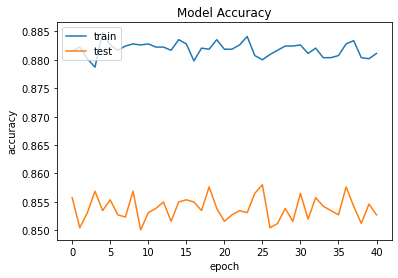

In [56]:
plt.plot(model_history1.history['accuracy'])
plt.plot(model_history1.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc ='upper left')
plt.show()

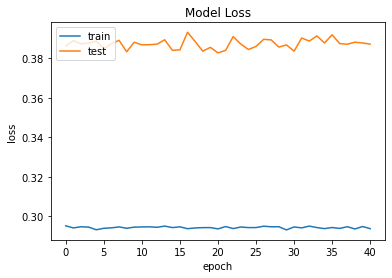

In [57]:
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [58]:
#Predicting fro test data
y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [60]:
y_pred = (y_pred>=0.5)

In [61]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [62]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1505,   90],
       [ 203,  202]], dtype=int64)

In [63]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8535

In [64]:
#getting the weights
classifier.get_weights()

[array([[ 0.31629542,  0.5390975 ,  0.233269  ,  0.8396522 ,  0.12376603,
          0.15089446, -0.3896349 , -0.0593744 , -0.12428359,  0.7178308 ,
         -0.35330078],
        [ 0.19375809, -1.2862648 ,  0.7917866 , -0.69092065, -0.9877008 ,
         -1.5827761 ,  0.6405012 , -0.5889599 , -1.304226  , -1.2449572 ,
         -0.31531382],
        [-0.03240673,  0.3353503 , -0.00245169,  0.9506431 ,  0.1636356 ,
          0.46632445,  0.504254  ,  0.3787976 ,  0.0453242 ,  0.22871001,
          0.38862893],
        [ 0.62740064, -1.7870239 , -0.04771515,  0.03685126, -1.0543581 ,
          0.91094124, -1.0600598 ,  0.01846613, -0.16794917, -1.1747905 ,
         -1.4039314 ],
        [ 1.544253  , -0.63014203,  0.14090617,  0.6262316 ,  0.28679085,
         -0.939515  ,  0.04307816,  1.8234563 ,  0.40009904,  0.15696418,
         -1.3077347 ],
        [ 0.1326527 ,  0.17712824, -0.07833507, -0.2011296 ,  0.5118191 ,
          0.2121529 , -0.24490602, -0.66164774, -0.0908858 , -0.5891028